# Data Science with Literature Analysis

This is an introductory tutorial to get started with using python for data science.

## Relevant Libraries
  * Pandas
  * matplotlib
  * numpy

## Resources

[Computational and Inferential Thinking Ebook](https://www.inferentialthinking.com/chapters/intro.html)

In [39]:
from urllib.request import urlopen
import re

def read_url(url):
    with urlopen(url) as f:
        text = f.read()
        text = text.decode('utf-8')
    return text

#Divides the text into respective chapters
def split_chapters(text, pattern = "CHAPTER\s[IVX]+\.\r\n"):
    pattern = re.compile(pattern)
    chapters = pattern.split(text)
    return chapters[1:]
    
    
# Let's do "Alice in Wonderland"
aiw_url = 'http://www.gutenberg.org/files/11/11-0.txt'
aiw_text = read_url(aiw_url)
aiw_chapters = split_chapters(aiw_text)
    
    
# Let's do "The Wonderful Wizard of Oz"
wwoo_url = 'http://www.gutenberg.org/cache/epub/55/pg55.txt'
wwoo_text = read_url(wwoo_url)
wwoo_chapters = split_chapters(wwoo_text, pattern = "[\d]+\.[\s]+[’\w\s\-\?]+\r\n\r\n\r\n")

len(aiw_chapters)

12

    Alice  Cat  Hatter  Queen  Rabbit
0      28    0       0      0       6
1      54    0       0      0      10
2      77    0       0      0      10
3     108    1       0      0      22
4     143   27       0      0      22
5     186   44       2      4      22
6     237   44      35      6      22
7     276   53      35     42      28
8     328   53      35     56      28
9     358   54      35     56      29
10    374   54      55     65      37
11    398   54      55     75      45


<Figure size 1440x1152 with 0 Axes>

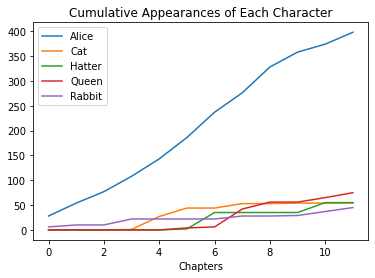

In [37]:
# Now let's visualize how many times each of these characters pop up in the book
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


aiw_characters = ['Alice', "Cat", "Hatter", "Queen", "Rabbit" ]

aiw_character_counts = pd.DataFrame()
for character in aiw_characters:
    aiw_character_counts[character] = np.char.count(aiw_chapters, character)
cum_aiw_counts = aiw_character_counts.cumsum()


aiw_character_counts
print(cum_aiw_counts)
plt.figure(figsize=(20,16))
cum_aiw_counts.plot(title = "Cumulative Appearances of Each Character")
plt.xlabel('Chapters')
plt.show()


    Dorothy  Toto  Scarecrow  Lion  Tin Woodman
0         0     0          0     0            0
1         0     0          0     0            0
2        17    10          0     0            0
3        47    13          0     0            0
4        71    27         12     0            0
5        79    30         28     0            0
6        92    34         46     0           12
7       107    43         55    24           21
8       121    47         71    49           32
9       140    52         91    65           46
10      145    57        101    74           51
11      163    63        109    85           54
12      196    66        123    98           62
13      234    74        137   115           69
14      247    75        145   122           76
15      281    79        165   132           88
16      284    79        175   141           92
17      294    81        178   142           94
18      309    81        189   144           98
19      317    83        197   149      

<Figure size 1440x1152 with 0 Axes>

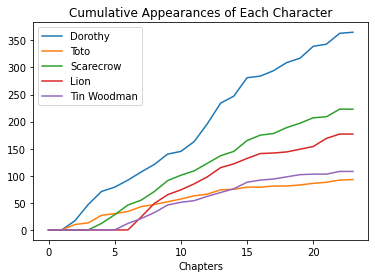

In [40]:
# Now let's try this for the Wizard of Oz
wwoo_characters = ['Dorothy', 'Toto', 'Scarecrow', 'Lion', 'Tin Woodman']

wwoo_character_counts = pd.DataFrame()
for character in wwoo_characters:
    wwoo_character_counts[character] = np.char.count(wwoo_chapters, character)
cum_wwoo_counts = wwoo_character_counts.cumsum()


wwoo_character_counts
print(cum_wwoo_counts)
plt.figure(figsize=(20,16))
cum_wwoo_counts.plot(title = "Cumulative Appearances of Each Character")
plt.xlabel('Chapters')
plt.show()